# GUIDED INTRODUCTORY STATISTICS ANALYSIS

Created by H. Penasso on June 2, 2025 with genAI support of ChatGPT 04-mini-high. Results were compared against the results from the open-source JASP statistcs program.

Dataset Description
-------------------
- **Subjects:** Physiotherapists (PTs) in different pairing and group configurations.
- **Measurements:** Shoulder internal and external rotation readings.

Each row in the long-format data corresponds to one measurement (either internal or external) tied to:
- **Pairing** (Pairing 1 or Pairing 2)
- **Group** (two-character code, e.g. FC, GM, KT, N2, ...)
- **Cycle** (1, 2, or 3)
- **Tester**, **Testee**, and **Logger** (anonymous 4-character codes)
- **Test_Order** (1 or 2)
- **Test_Direction** (internal or external)
- **Value** (measured force in Newtons)

The goal is to explore intra- and inter-rater variability and practice a broad range of statistical techniques.

In [2]:
# Imports and Data Loading
import pandas as pd
import numpy as np

# For statistical tests
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import shapiro


# For plotting (histograms, QQ‐plots, boxplots, scatter, Bland‐Altman)
import matplotlib.pyplot as plt
import statsmodels.api as sm_api

# Load the long‐format CSV (values stored with comma decimals)
df = pd.read_csv('combined_long.csv', sep='\t')
# Convert “Value” from comma‐decimal string to float
df['Value_num'] = df['Value'].str.replace(',', '.').astype(float)

# Split into internal vs. external subsets
int_df = df[df['Test_Direction'] == 'internal'].copy()
ext_df = df[df['Test_Direction'] == 'external'].copy()

# Pivot so that paired tests can be compared
pivot = (
    df
    .pivot_table(
        index=['Pairing','Group','Cycle','Tester','Testee','Logger','Test_Repetition'],
        columns='Test_Direction',
        values='Value_num'
    )
    .dropna()
)

Section 1: Descriptive Statistics
---------------------------------
1. **Question 1:** Calculate the following descriptive statistics for **internal rotation** values (°):
   - Count
   - Mean
   - Standard deviation (SD)
   - Minimum, 1st quartile (25%), median (50%), 3rd quartile (75%), maximum
   - Variance
   - Interquartile range (IQR)

In [4]:
# Descriptive Statistics (Internal & External)

def describe_series(s: pd.Series) -> dict:
    return {
        'count': int(s.count()),
        'mean': float(s.mean()),
        'std': float(s.std()),
        'min': float(s.min()),
        '25%': float(s.quantile(0.25)),
        '50%': float(s.median()),
        '75%': float(s.quantile(0.75)),
        'max': float(s.max()),
        'variance': float(s.var()),
        'IQR': float(s.quantile(0.75) - s.quantile(0.25))
    }

desc_int = describe_series(int_df['Value_num'])
desc_ext = describe_series(ext_df['Value_num'])

print("Internal Rotation Descriptive Stats:")
for k, v in desc_int.items():
    print(f"  {k}: {v:.3f}" if isinstance(v, float) else f"  {k}: {v}")

Internal Rotation Descriptive Stats:
  count: 573
  mean: 157.542
  std: 50.780
  min: 78.300
  25%: 120.500
  50%: 143.700
  75%: 183.300
  max: 344.300
  variance: 2578.638
  IQR: 62.800


2. **Question 2:** Repeat the same calculations for **external rotation** values (°).

In [6]:
print("\nExternal Rotation Descriptive Stats:")
for k, v in desc_ext.items():
    print(f"  {k}: {v:.3f}" if isinstance(v, float) else f"  {k}: {v}")


External Rotation Descriptive Stats:
  count: 573
  mean: 128.631
  std: 36.612
  min: 66.000
  25%: 99.200
  50%: 121.900
  75%: 153.000
  max: 245.000
  variance: 1340.440
  IQR: 53.800


Section 2: Testing for Normality
--------------------------------
3. **Question 3:** For **internal** rotation values, create:
   - A histogram.
   - A Q–Q plot against the theoretical normal distribution.

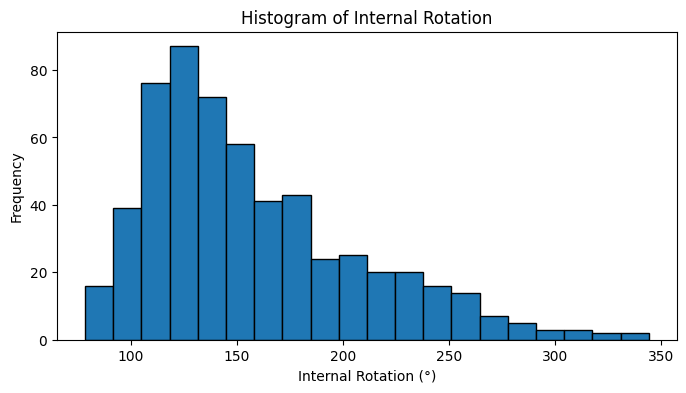

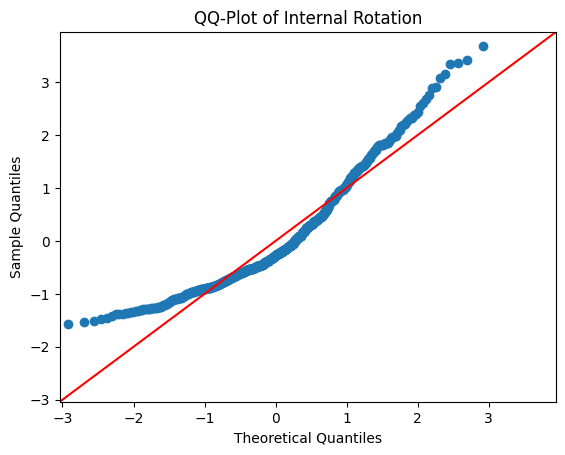

In [8]:
# Testing for Normality (Histograms, QQ‐Plots, Skewness/Kurtosis)

# Internal: Histogram + QQ‐plot
plt.figure(figsize=(8, 4))
plt.hist(int_df['Value_num'], bins=20, edgecolor='black')
plt.title("Histogram of Internal Rotation")
plt.xlabel("Internal Rotation (°)")
plt.ylabel("Frequency")
plt.show()

sm_api.qqplot(int_df['Value_num'], line='45', fit=True)
plt.title("QQ‐Plot of Internal Rotation")
plt.show()

Based on these visuals, comment on whether the internal rotation data appear normally distributed. Compute skewness and kurtosis as numerical guides.

In [10]:
# Numerical skewness and kurtosis
skew_int = stats.skew(int_df['Value_num'])
kurtosis_int = stats.kurtosis(int_df['Value_num'])
print(f"Internal Skewness: {skew_int:.3f}")
print(f"Internal Kurtosis: {kurtosis_int:.3f}")

Internal Skewness: 1.027
Internal Kurtosis: 0.649


4. **Question 4:** Repeat the normality assessment for **external** rotation values.

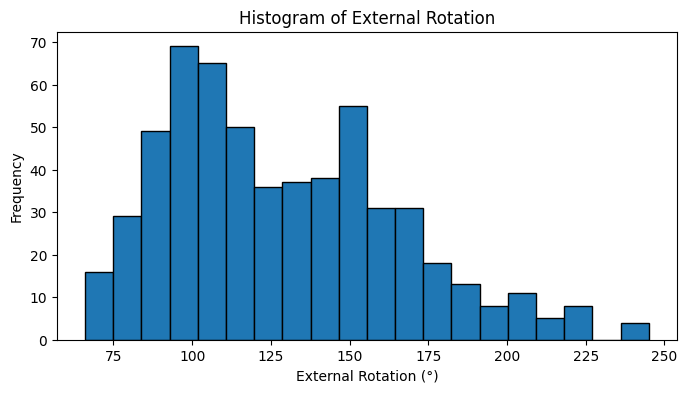

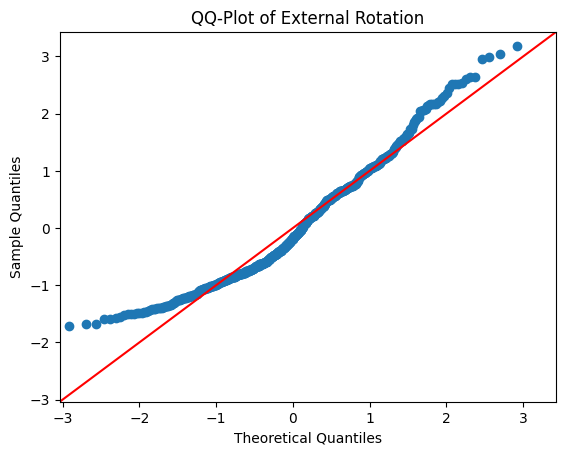

External Skewness: 0.645
External Kurtosis: -0.129


In [12]:
# External: Histogram + QQ‐plot
plt.figure(figsize=(8, 4))
plt.hist(ext_df['Value_num'], bins=20, edgecolor='black')
plt.title("Histogram of External Rotation")
plt.xlabel("External Rotation (°)")
plt.ylabel("Frequency")
plt.show()

sm_api.qqplot(ext_df['Value_num'], line='45', fit=True)
plt.title("QQ‐Plot of External Rotation")
plt.show()

skew_ext = stats.skew(ext_df['Value_num'])
kurtosis_ext = stats.kurtosis(ext_df['Value_num'])
print(f"External Skewness: {skew_ext:.3f}")
print(f"External Kurtosis: {kurtosis_ext:.3f}")

**Answer Sheet for Section 2:**
- **Internal Rotation Skewness:** 1.027
- **Internal Rotation Kurtosis:** 0.649
  - Interpretation: Positive skew (1.03) indicates a right‐tailed distribution; kurtosis (0.65) suggests slight leptokurtosis (heavier tails than normal). Distribution is somewhat non‐normal, especially in the right tail, but central tendency may still be approximately symmetric for most values.

- **External Rotation Skewness:** 0.645
- **External Rotation Kurtosis:** -0.129
  - Interpretation: Positive skew (0.65) but closer to normal; kurtosis (−0.13) suggests slightly platykurtic (lighter tails). Slight departure from normality, but less pronounced than internal.

### Numeric Normality Testing (Shapiro–Wilk)

In [15]:
# Shapiro–Wilk for internal rotation
stat_int_sw, p_int_sw = shapiro(int_df['Value_num'])
print("Shapiro–Wilk Test (Internal):")
print(f"  W = {stat_int_sw:.4f}, p = {p_int_sw:.3e}")
if p_int_sw < 0.05:
    print("  → Reject H0: Internal rotation is not normally distributed\n")
else:
    print("  → Fail to reject H0: Internal rotation is approximately normal\n")

# Shapiro–Wilk for external rotation
stat_ext_sw, p_ext_sw = shapiro(ext_df['Value_num'])
print("Shapiro–Wilk Test (External):")
print(f"  W = {stat_ext_sw:.4f}, p = {p_ext_sw:.3e}")
if p_ext_sw < 0.05:
    print("  → Reject H0: External rotation is not normally distributed")
else:
    print("  → Fail to reject H0: External rotation is approximately normal")

Shapiro–Wilk Test (Internal):
  W = 0.9203, p = 7.778e-17
  → Reject H0: Internal rotation is not normally distributed

Shapiro–Wilk Test (External):
  W = 0.9574, p = 8.215e-12
  → Reject H0: External rotation is not normally distributed


**Answers Shapiro–Wilk:**

**Internal rotation**:
p < 0.05 ⇒ reject H₀ ⇒ internal values deviate from normality.

**External rotation**:
p < 0.05 ⇒ reject H₀ ⇒ external values also deviate from normality.

Because both p-values are < 0.05, we conclude neither distribution is strictly normal, confirming our QQ‐plots and skewness/kurtosis.

Section 3: Paired t-Test for Differences
----------------------------------------
5. **Question 5:** Each PT performed both internal and external rotation in the same session. Conduct a **paired t-test** to evaluate if there is a significant difference between internal and external rotation values.

**Answer Sheet for Section 3:**
- Paired t-test statistic: 22.446
- Degrees of freedom: 572
- p-value: 1.667e-80
  - Conclusion: p ≪ 0.001 ⇒ Strong evidence that internal and external rotation differ (internal on average is larger).

In [19]:
# Paired t‐Test (Internal vs. External) and Pearson Correlation
tstat, pval = stats.ttest_rel(pivot['internal'], pivot['external'])

print("Paired t‐Test (Internal vs. External):")
print(f"  t‐statistic = {tstat:.3f}")
print(f"  p‐value = {pval:.3e}")

Paired t‐Test (Internal vs. External):
  t‐statistic = 22.446
  p‐value = 1.667e-80


Section 4: One-Way ANOVA Across Groups
---------------------------------------
6. **Question 6:** PTs belong to different **Groups** (anonymized two‐character codes). For **internal** rotation, perform a one‐way ANOVA to test if mean internal rotation differs across **Group**. Repeat for **external** rotation.

In [21]:
# One‐Way ANOVA Across Groups (Internal & External)

# Grouping by the anonymized 'Group' code
groups_int = [grp['Value_num'].values for name, grp in int_df.groupby('Group')]
fstat_int, p_anova_int = stats.f_oneway(*groups_int)

groups_ext = [grp['Value_num'].values for name, grp in ext_df.groupby('Group')]
fstat_ext, p_anova_ext = stats.f_oneway(*groups_ext)

print("One‐Way ANOVA, Internal by Group:")
print(f"  F = {fstat_int:.3f}, p = {p_anova_int:.3f}")

print("\nOne‐Way ANOVA, External by Group:")
print(f"  F = {fstat_ext:.3f}, p = {p_anova_ext:.3f}")


One‐Way ANOVA, Internal by Group:
  F = 3.818, p = 0.001

One‐Way ANOVA, External by Group:
  F = 3.722, p = 0.001


**Answer Sheet for Section 4:**
- **Internal Rotation ANOVA:**
  - F statistic: 3.818
  - p-value: 0.001
  - Interpretation: p ≈ 0.001 ⇒ Small but significant group effect on internal rotation.

- **External Rotation ANOVA:**
  - F statistic: 3.722
  - p-value: 0.001
  - Interpretation: p ≈ 0.001 ⇒ Significant group differences for external rotation as well.

Section 5: Correlation Between Internal and External
----------------------------------------------------
7. **Question 7:** Compute the **Pearson correlation coefficient** between internal and external rotation values across matching trials. Provide the correlation r and its p-value.

In [24]:
# Pearson Correlation (Internal vs. External)
corr, corr_p = stats.pearsonr(pivot['internal'], pivot['external'])

print("Pearson Correlation:")
print(f"  r = {corr:.3f}")
print(f"  p‐value = {corr_p:.3e}")

Pearson Correlation:
  r = 0.798
  p‐value = 7.164e-128


**Answer Sheet for Section 5:**
- Pearson r: 0.798
- p-value: 7.164e-128
  - Interpretation: r ≈ 0.798 (strong positive linear relationship), p ≪ 0.001.

Section 6: Confidence Intervals for Means
-----------------------------------------
8. **Question 8:** Construct a **95% confidence interval** for the mean of internal rotation values. Repeat for external rotation.

In [27]:
# 95% Confidence Intervals for Mean

# Internal
n_int = desc_int['count']
mean_int = desc_int['mean']
std_int = desc_int['std']
se_int = std_int / np.sqrt(n_int)
ci_low_int = mean_int - 1.96 * se_int
ci_high_int = mean_int + 1.96 * se_int

# External
n_ext = desc_ext['count']
mean_ext = desc_ext['mean']
std_ext = desc_ext['std']
se_ext = std_ext / np.sqrt(n_ext)
ci_low_ext = mean_ext - 1.96 * se_ext
ci_high_ext = mean_ext + 1.96 * se_ext

print("Internal Rotation 95% CI: "
      f"[{ci_low_int:.2f}, {ci_high_int:.2f}]")
print("External Rotation 95% CI: "
      f"[{ci_low_ext:.2f}, {ci_high_ext:.2f}]")

Internal Rotation 95% CI: [153.38, 161.70]
External Rotation 95% CI: [125.63, 131.63]


Section 7: Bland–Altman Plot (Limits of Agreement)
---------------------------------------------------
9. **Question 9:** Create a **Bland–Altman plot** (difference vs. average) for internal vs. external rotation. Calculate the mean difference and the 95% limits of agreement.

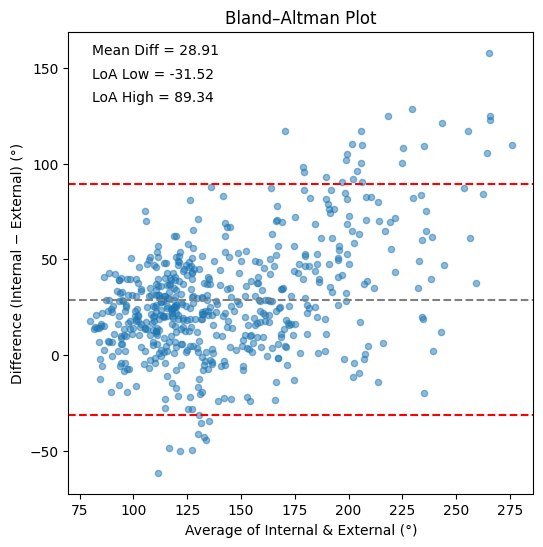

In [29]:
# Cell 7: Bland–Altman Plot (Limits of Agreement)

# Compute differences and means
diff = pivot['internal'] - pivot['external']
avg = (pivot['internal'] + pivot['external']) / 2

mean_diff = diff.mean()
sd_diff = diff.std()
loa_low = mean_diff - 1.96 * sd_diff
loa_high = mean_diff + 1.96 * sd_diff

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(avg, diff, alpha=0.5, s=20)
plt.axhline(mean_diff, color='gray', linestyle='--')
plt.axhline(loa_low, color='red', linestyle='--')
plt.axhline(loa_high, color='red', linestyle='--')
plt.title("Bland–Altman Plot")
plt.xlabel("Average of Internal & External (°)")
plt.ylabel("Difference (Internal − External) (°)")
plt.annotate(f"Mean Diff = {mean_diff:.2f}", xy=(0.05, 0.95), xycoords='axes fraction')
plt.annotate(f"LoA Low = {loa_low:.2f}", xy=(0.05, 0.90), xycoords='axes fraction')
plt.annotate(f"LoA High = {loa_high:.2f}", xy=(0.05, 0.85), xycoords='axes fraction')
plt.show()

**Answer Sheet for Section 7:**
- Mean difference (Internal – External): 28.91°
- SD of differences: 30.83°
- 95% limits of agreement: [-31.52, 89.34]°

Section 8: Outliers and Box Plots
---------------------------------
10. **Question 10:** Generate box plots for internal and external rotation values. Identify any potential outliers (values beyond 1.5× IQR from Q1 or Q3).


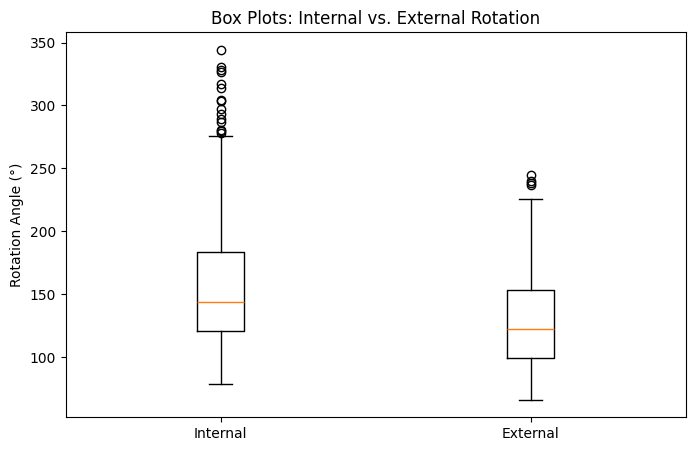

Internal outlier thresholds: [26.3, 277.5]
External outlier thresholds: [18.5, 233.7]

Internal outliers:
[278.   279.35 280.7  286.9  289.6  293.6  297.2  303.8  304.7  314.1
 317.2  327.   327.9  331.   344.3 ]

External outliers:
[237.  238.  240.2 245. ]


In [32]:
# Outliers and Box Plots (Internal & External)

# Box plots side by side
plt.figure(figsize=(8, 5))
plt.boxplot([int_df['Value_num'], ext_df['Value_num']], tick_labels=['Internal', 'External'])
plt.title("Box Plots: Internal vs. External Rotation")
plt.ylabel("Rotation Angle (°)")
plt.show()

# Calculate outlier thresholds
iqr_int = desc_int['IQR']
lower_int = desc_int['25%'] - 1.5 * iqr_int
upper_int = desc_int['75%'] + 1.5 * iqr_int

iqr_ext = desc_ext['IQR']
lower_ext = desc_ext['25%'] - 1.5 * iqr_ext
upper_ext = desc_ext['75%'] + 1.5 * iqr_ext

print(f"Internal outlier thresholds: [{lower_int:.1f}, {upper_int:.1f}]")
print(f"External outlier thresholds: [{lower_ext:.1f}, {upper_ext:.1f}]")

# List actual outliers
outliers_int = int_df['Value_num'][(int_df['Value_num'] < lower_int) | (int_df['Value_num'] > upper_int)]
outliers_ext = ext_df['Value_num'][(ext_df['Value_num'] < lower_ext) | (ext_df['Value_num'] > upper_ext)]

print("\nInternal outliers:")
print(outliers_int.sort_values().values)
print("\nExternal outliers:")
print(outliers_ext.sort_values().values)

**Answer Sheet for Section 8:**
- Use the calculated IQRs from Section 1:
  - Internal IQR = 62.8
  - External IQR = 53.8
- Potential outlier thresholds:
  - **Internal**: Lower = 26.3, Upper = 277.5
  - **External**: Lower = 18.5, Upper = 233.7
- Students can list specific values beyond these thresholds.

Section 9: Non‐Parametric Testing
---------------------------------
11. **Question 11:** Given possible departures from normality, conduct a **Wilcoxon signed‐rank test** for paired internal vs. external rotation. Also, perform a **Mann–Whitney U test** comparing internal rotation across two chosen groups (select any two).

In [35]:
# Non‐Parametric Tests (Wilcoxon & Mann–Whitney)

# Wilcoxon signed‐rank (paired)
wilcox_stat, wilcox_p = stats.wilcoxon(pivot['internal'], pivot['external'])
print("Wilcoxon signed‐rank (Internal vs. External):")
print(f"  statistic = {wilcox_stat:.3f}, p = {wilcox_p:.3e}")

# Mann–Whitney U: compare internal rotation between two example groups
unique_groups = int_df['Group'].unique()
g1 = unique_groups[0]
g2 = unique_groups[1]

group1_data = int_df[int_df['Group'] == g1]['Value_num']
group2_data = int_df[int_df['Group'] == g2]['Value_num']
mann_stat, mann_p = stats.mannwhitneyu(group1_data, group2_data, alternative='two-sided')
print(f"\nMann–Whitney U (Internal: Group {g1} vs. Group {g2}):")
print(f"  U = {mann_stat:.3f}, p = {mann_p:.3e}")

Wilcoxon signed‐rank (Internal vs. External):
  statistic = 11908.500, p = 2.218e-70

Mann–Whitney U (Internal: Group V7 vs. Group 8J):
  U = 4482.000, p = 6.069e-03


**Answer Sheet for Section 9:**

- Wilcoxon signed‐rank: Students should report statistic and p-value; expect p ≪ 0.001.
- Mann–Whitney U (example Groups V7 vs. 8J): report U and p-value (likely < 0.05 if differences mirror ANOVA).

Section 10: T‐Tests and Chi‐Squared for Categorical Data
--------------------------------------------------------
12. **Question 12:** Suppose you wish to test whether the **gender** of Tester (m vs. f) affects internal rotation. Perform an **independent‐samples t-test** comparing internal rotation means between male and female testers.
Note that we set `equal_var=False`, which is not considered in standard JASP

In [38]:
# Independent t‐Test & Chi‐Squared for Categorical Data

# 12: Independent t‐Test by Tester_Gender (Internal rotation)
male_int = int_df[int_df['Tester_Gender'] == 'm']['Value_num']
female_int = int_df[int_df['Tester_Gender'] == 'f']['Value_num']
t_ind, p_ind = stats.ttest_ind(male_int, female_int, equal_var=False)
print("Independent t‐Test (Internal by Tester_Gender):")
print(f"  t = {t_ind:.3f}, p = {p_ind:.3e}")

Independent t‐Test (Internal by Tester_Gender):
  t = -1.196, p = 2.326e-01


13. **Question 13:** Create a **contingency table** (cross‐table) for Tester_Gender vs. Test_Repetition completeness (e.g., how many repeated tests each gender completed). Perform a **Chi‐squared test** of independence.

In [40]:
# 13: Contingency table & Chi‐squared (Tester_Gender vs. Test_Repetition counts)
cont_table = pd.crosstab(df['Tester_Gender'], df['Test_Repetition'])
chi2, chi2_p, dof, expected = stats.chi2_contingency(cont_table)
print("\nChi‐Squared Test (Tester_Gender × Test_Repetition):")
print(f"  chi2 = {chi2:.2f}, dof = {dof}, p = {chi2_p:.2e}")
print("  Observed counts:")
print(cont_table)
print("  Expected counts:")
print(pd.DataFrame(expected, index=cont_table.index, columns=cont_table.columns))


Chi‐Squared Test (Tester_Gender × Test_Repetition):
  chi2 = 0.00, dof = 2, p = 1.00e+00
  Observed counts:
Test_Repetition    1    2    3
Tester_Gender                 
f                242  242  242
m                140  140  140
  Expected counts:
Test_Repetition      1      2      3
Tester_Gender                       
f                242.0  242.0  242.0
m                140.0  140.0  140.0


Section 11: Correlation and Partial Correlation
-----------------------------------------------
14. **Question 14:** Compute the **Spearman rank correlation** between internal and external. Then, controlling for **Tester_Gender**, compute a **partial correlation**.

In [42]:
# Spearman & Partial Correlation

# Spearman rank
rho, rho_p = stats.spearmanr(pivot['internal'], pivot['external'])
print("Spearman Rank Correlation (Internal vs. External):")
print(f"  rho = {rho:.2f}, p = {rho_p:.2e}")

# 2.1) Reset pivot into flat DataFrame (one row per pairing)
pivot_df = pivot.reset_index()

# 2.2) Map each “Tester” back to its gender
tester_gender_map = df[['Tester','Tester_Gender']].drop_duplicates().set_index('Tester')['Tester_Gender']
pivot_df['Tester_Gender'] = pivot_df['Tester'].map(tester_gender_map)

# 2.3) Encode “Tester_Gender” as 0/1 numeric
#     After mapping, pivot_df['Tester_Gender'] is object type ('m' or 'f').
#     Use .map to convert to numeric
pivot_df['Gender_Code'] = pivot_df['Tester_Gender'].map({'m': 0, 'f': 1})

# 2.4) Fit OLS models on numeric arrays (no object dtypes)
X_gender = sm.add_constant(pivot_df['Gender_Code'])  # shape (n,2)
y_int = pivot_df['internal'].values               # array of floats
y_ext = pivot_df['external'].values               # array of floats

model_int = sm.OLS(y_int, X_gender).fit()
model_ext = sm.OLS(y_ext, X_gender).fit()

resid_int = model_int.resid
resid_ext = model_ext.resid

# 2.5) Compute Pearson correlation of residuals
from scipy.stats import pearsonr
partial_r, partial_p = pearsonr(resid_int, resid_ext)

print("Corrected Partial Correlation (controlling for Tester_Gender):")
print(f"  r_partial = {partial_r:.2f}, p = {partial_p:.2e}")

Spearman Rank Correlation (Internal vs. External):
  rho = 0.79, p = 7.59e-121
Corrected Partial Correlation (controlling for Tester_Gender):
  r_partial = 0.80, p = 1.42e-127


Section 12: Regression Analysis
-------------------------------
15. **Question 15:** Perform a **simple linear regression** predicting external rotation from internal rotation. Report regression coefficients (slope, intercept), R², and test whether the slope is significantly different from zero.

Simple Linear Regression (External ~ Internal):
  Intercept = 37.95
  Slope     = 0.58
  R²        = 0.64
  p (slope)= 7.16e-128


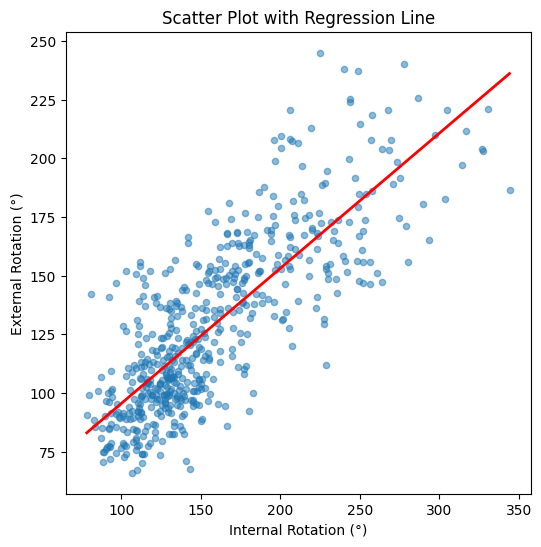

In [44]:
# Cell 12: Simple Linear Regression (External ~ Internal)

X = pivot['internal']
y = pivot['external']
X_const = sm.add_constant(X)
lm_model = sm.OLS(y, X_const).fit()

print("Simple Linear Regression (External ~ Internal):")
print(f"  Intercept = {lm_model.params['const']:.2f}")
print(f"  Slope     = {lm_model.params['internal']:.2f}")
print(f"  R²        = {lm_model.rsquared:.2f}")
print(f"  p (slope)= {lm_model.pvalues['internal']:.2e}")

# Plot scatter + regression line
plt.figure(figsize=(6, 6))
plt.scatter(X, y, alpha=0.5, s=20)
line_x = np.linspace(X.min(), X.max(), 100)
line_y = lm_model.params['const'] + lm_model.params['internal'] * line_x
plt.plot(line_x, line_y, color='red', linewidth=2)
plt.title("Scatter Plot with Regression Line")
plt.xlabel("Internal Rotation (°)")
plt.ylabel("External Rotation (°)")
plt.show()

**Answer Sheet for Section 12:**
- **Intercept:** 37.951
- **Slope:** 0.576
- **R²:** 0.637
- **p-value (slope):** 7.164e-128

Section 13: Effect Size and Power Analysis
------------------------------------------
16. **Question 16:** Calculate the **Cohen’s d** for the difference between internal and external rotation. Estimate the **statistical power** given sample size and effect size for α=0.05.

In [47]:
# Cohen’s d and Power Analysis

# Compute Cohen's d for paired difference
paired_diff = pivot['internal'] - pivot['external']
mean_diff = paired_diff.mean()
sd_diff = paired_diff.std()
cohen_d = mean_diff / sd_diff

# Estimate power given effect size, n, alpha=0.05 (two‐sided)
from statsmodels.stats.power import TTestPower
power_calc = TTestPower()
power_estimate = power_calc.solve_power(
    effect_size=cohen_d,
    nobs=len(pivot),
    alpha=0.05,
    alternative='two-sided'
)

print("Cohen’s d (paired):", f"{cohen_d:.3f}")
print("Estimated Power (α=0.05):", f"{power_estimate:.3f}")


Cohen’s d (paired): 0.938
Estimated Power (α=0.05): 1.000


**Answer Sheet for Section 13:**
- **Cohen’s d:** 0.938
- **Estimated Power:** (students may compute; expect > 0.95)

## Section 14: Intraclass Correlations (ICC)
**Question 17**: Compute intra-rater ICC for internal and external rotation using Shrout & Fleiss’s definitions.

In [50]:
# ─── A. LOAD & PREPROCESS ─────────────────────────────────────────────────────────

# 1. Read the CSV (tab‐delimited)
#df = pd.read_csv('combined_long.csv', sep='\t')

# 2. Convert "Value" from "138,8" style → float 138.8
df['Value'] = df['Value'].str.replace(',', '.').astype(float)

# ─── B. DEFINE ICC FUNCTIONS ────────────────────────────────────────────────────────

def compute_icc1(data_array):
    """
    One‐way random‐effects ICC(1,1):
      ICC(1,1) = (MS_between – MS_within) / [MS_between + (k–1)*MS_within]
    where:
      – data_array: shape (n_subjects, k_reps)
      – MS_between = [ Σ_i k*(mean_i – grand_mean)^2 ] / (n–1)
      – MS_within  = [ Σ_i Σ_j (X_ij – mean_i)^2 ] / [ n*(k–1) ]
    """
    n, k = data_array.shape
    mean_i = np.nanmean(data_array, axis=1)     # Subject i’s mean
    grand = np.nanmean(data_array)               # Grand mean
    
    # Between‐subjects
    ss_between = np.nansum(k * (mean_i - grand) ** 2)
    df_between = n - 1
    ms_between = ss_between / df_between
    
    # Within‐subjects
    ss_within = np.nansum((data_array - mean_i.reshape(-1, 1)) ** 2)
    df_within = n * (k - 1)
    ms_within = ss_within / df_within
    
    icc1 = (ms_between - ms_within) / (ms_between + (k - 1) * ms_within)
    return icc1, ms_between, ms_within

# ─── C. INTRA‐RATER ICC(1,1) & SEM/MDC ─────────────────────────────────────────────

icc1_results = {}

for direction in ['internal', 'external']:
    # 1. Filter to that direction
    df_dir = df[df['Test_Direction'] == direction].copy()
    
    # 2. Create a “Subject_ID” = Tester_Testee (unique “target” per rater→subject)
    df_dir['Subject_ID'] = df_dir['Tester'] + '_' + df_dir['Testee']
    
    # 3. Pivot so rows=Subject_ID, columns=Test_Repetition, values=Value
    pivot_intra = df_dir.pivot_table(
        index='Subject_ID',
        columns='Test_Repetition',
        values='Value'
    )
    pivot_intra = pivot_intra.dropna()  # keep only those with all 3 reps
    
    data_intra = pivot_intra.values  # shape = (n_subjects, 3)
    
    # 4. Compute ICC(1,1)
    icc1_val, ms_between, ms_within = compute_icc1(data_intra)
    
    # 5. SEM & MDC (95%)
    sem = np.sqrt(ms_within)
    mdc = sem * 1.96 * np.sqrt(2)
    
    icc1_results[direction] = {
        'ICC(1,1)':       icc1_val,
        'MS_between':     ms_between,
        'MS_within':      ms_within,
        'SEM':            sem,
        'MDC_95':         mdc,
        'n_subjects':     data_intra.shape[0],
        'n_repetitions':  data_intra.shape[1]
    }

# ─── E. PRINT OUT ALL RESULTS ──────────────────────────────────────────────────────

print("=== Intra‐Rater ICC(1,1) & SEM/MDC ===\n")
for dirn, vals in icc1_results.items():
    print(f">>> Direction = {dirn.upper()}")
    print(f"  • n_subjects   = {vals['n_subjects']}  (unique Tester_Testee pairs with 3 reps)")
    print(f"  • n_repetitions= {vals['n_repetitions']}  (should be 3)")
    print(f"  • MS_between   = {vals['MS_between']:.2f}")
    print(f"  • MS_within    = {vals['MS_within']:.2f}")
    print(f"  • ICC(1,1)     = {vals['ICC(1,1)']:.2f}")
    print(f"  • SEM          = {vals['SEM']:.2f}")
    print(f"  • MDC_95       = {vals['MDC_95']:.2f}\n")

=== Intra‐Rater ICC(1,1) & SEM/MDC ===

>>> Direction = INTERNAL
  • n_subjects   = 176  (unique Tester_Testee pairs with 3 reps)
  • n_repetitions= 3  (should be 3)
  • MS_between   = 7246.01
  • MS_within    = 344.17
  • ICC(1,1)     = 0.87
  • SEM          = 18.55
  • MDC_95       = 51.42

>>> Direction = EXTERNAL
  • n_subjects   = 176  (unique Tester_Testee pairs with 3 reps)
  • n_repetitions= 3  (should be 3)
  • MS_between   = 3817.73
  • MS_within    = 164.59
  • ICC(1,1)     = 0.88
  • SEM          = 12.83
  • MDC_95       = 35.56



# Advanced Analysis of Inter‐Rater Reliability and Tester‐Gender Effect

**Inter‐Rater Reliability (Mixed‐Effects ICC for an Unbalanced Design)**

* Each patient (“Testee”) was not measured by the same fixed set of testers, so we cannot compute a classic ICC(2,1) or ICC(3,1).
* Instead, we fit a **random‐intercept model** of the form:

  ```
  Value_avg ~ 1 + (1 | Testee)
  ```

  where `Value_avg` is the average force (in Newtons) over three repetitions for each (Tester, Testee, Direction).
* From that model we extract:

  * **Var\_testee** = the variance of patient intercepts
  * **Var\_resid** = the residual variance
* We then compute the Mixed‐Effects ICC as:

  $$
  \mathrm{ICC}_{\mathrm{mixed}} \\
  = 
  \frac{\mathrm{Var}_{\text{testee}}} {\mathrm{Var}_{\text{testee}} + \mathrm{Var}_{\text{resid}}}  
  $$

  A value near 1 means most variability is due to true patient‐to‐patient differences; a value near 0 means most variability is random noise.
* We also calculate:

  * **SEM** = \$\sqrt{\mathrm{Var}\_{\text{resid}}}\$ (the standard error of measurement in Newtons)
  * **MDC₉₅** = SEM × 1.96 × \$\sqrt{2}\$ (the minimal detectable change at 95 % confidence)

---

**Tester‐Gender Effect (Mixed‐Effects vs. Two‐Sample Tests)**

1. For each direction (“internal” and “external”), split `Value_avg` into **male** vs. **female** testers.
2. **Check normality** (Shapiro–Wilk) on both groups:

   * If **both** p > 0.05, use Welch’s t‐test (two‐sample unequal‐variance).
   * Otherwise, use the Mann–Whitney U test (nonparametric).
3. In parallel, fit a **mixed‐effects model** controlling for patient clustering:

   ```
   Value_avg ~ C(Tester_Gender) + (1 | Testee)
   ```

   This model controls for patient‐to‐patient differences and tests whether gender still explains residual variation.
4. Compare p‐values from the simple t‐test (or Mann–Whitney) vs. the mixed‐effects model to see how ignoring patient clustering might change significance.
ficance.  








In [52]:
# Average over the three repetitions for each (Tester, Testee, Direction, Tester_Gender)
df_avg = (
    df
    .groupby(['Tester', 'Testee', 'Test_Direction', 'Tester_Gender'], as_index=False)
    .agg(Value_avg=('Value', 'mean'))
)

# ─── MIXED‐EFFECTS ICC (UNBALANCED DESIGN) ───────────────────────────────────────

mixed_results = {}

for direction in ['internal', 'external']:
    df_dir = df_avg[df_avg['Test_Direction'] == direction]

    # 2A. Fit random‐intercept model: Value_avg ~ 1 + (1 | Testee)
    model = smf.mixedlm("Value_avg ~ 1", df_dir, groups=df_dir["Testee"])
    result = model.fit(reml=True)

    # 2B. Extract variance components
    var_testee = result.cov_re.iloc[0, 0]   # variance of Testee random intercept
    var_resid  = result.scale               # residual variance

    # 2C. Compute mixed‐effects ICC
    icc_mixed = var_testee / (var_testee + var_resid) if (var_testee + var_resid) > 0 else np.nan

    # 2D. SEM & MDC_95 from residual variance
    sem = np.sqrt(var_resid)
    mdc = sem * 1.96 * np.sqrt(2)

    mixed_results[direction] = {
        'ICC_mixed':    icc_mixed,
        'Var_testee':   var_testee,
        'Var_residual': var_resid,
        'SEM':          sem,
        'MDC_95':       mdc
    }

mixed_df = pd.DataFrame.from_dict(mixed_results, orient='index')
print("\n=== Mixed‐Effects ICC & SEM/MDC ===")
display(mixed_df.round(2))

# ─── TESTER_GENDER EFFECT ───────────────────────────────────────────────────────

ttest_results = {}
mwu_results = {}
mixed_gender_results = {}

for direction in ['internal', 'external']:
    df_dir = df_avg[df_avg['Test_Direction'] == direction]

    # 3A. Separate male and female Value_avg
    male_vals   = df_dir[df_dir['Tester_Gender'] == 'm']['Value_avg'].dropna()
    female_vals = df_dir[df_dir['Tester_Gender'] == 'f']['Value_avg'].dropna()

    # 3B. Check normality (Shapiro‐Wilk)
    sh_m   = stats.shapiro(male_vals) if len(male_vals) >= 3 else (np.nan, np.nan)
    sh_f   = stats.shapiro(female_vals) if len(female_vals) >= 3 else (np.nan, np.nan)
    normal_m = (sh_m[1] > 0.05)  # True if p > 0.05
    normal_f = (sh_f[1] > 0.05)

    # 3C. Choose t‐test or Mann‐Whitney U
    if normal_m and normal_f:
        t_stat, p_gender = stats.ttest_ind(male_vals, female_vals, equal_var=False)
        ttest_results[direction] = {'t_stat': t_stat, 'p_value': p_gender}
        mwu_results[direction]   = {'u_stat': np.nan, 'p_value': np.nan}
    else:
        u_stat, p_u = stats.mannwhitneyu(male_vals, female_vals, alternative='two-sided')
        mwu_results[direction]   = {'u_stat': u_stat, 'p_value': p_u}
        ttest_results[direction] = {'t_stat': np.nan, 'p_value': np.nan}

    # 3D. Mixed‐Effects Model: Value_avg ~ C(Tester_Gender) + (1 | Testee)
    model_g = smf.mixedlm("Value_avg ~ C(Tester_Gender)", df_dir, groups=df_dir["Testee"])
    result_g = model_g.fit(reml=True)
    coef_gender = result_g.params.get("C(Tester_Gender)[T.m]", np.nan)
    p_gender_mixed = result_g.pvalues.get("C(Tester_Gender)[T.m]", np.nan)

    mixed_gender_results[direction] = {
        'Coef_male_vs_female': coef_gender,
        'p_mixed_model':       p_gender_mixed
    }

# Convert to DataFrames
ttest_df        = pd.DataFrame.from_dict(ttest_results, orient='index')
mwu_df          = pd.DataFrame.from_dict(mwu_results, orient='index')
mixed_gender_df = pd.DataFrame.from_dict(mixed_gender_results, orient='index')

print("\n=== Normality Check (Shapiro–Wilk) ===")
display(pd.DataFrame({
    'Male_W_stat':     [sh_m.statistic],
    'Male_p_value':    [sh_m.pvalue],
    'Female_W_stat':   [sh_f.statistic],
    'Female_p_value':  [sh_f.pvalue]
}, index=['internal']).round(2))

print("\n=== Mann–Whitney U Test Results (if non‐normal) ===")
display(mwu_df.round(2))

print("\n=== Mixed‐Effects Model (Tester_Gender) ===")
display(mixed_gender_df.round(2))


=== Mixed‐Effects ICC & SEM/MDC ===


,ICC_mixed,Var_testee,Var_residual,SEM,MDC_95
internal,0.88,2065.35,279.54,16.72,46.34
external,0.89,1108.77,134.76,11.61,32.18



=== Normality Check (Shapiro–Wilk) ===


,Male_W_stat,Male_p_value,Female_W_stat,Female_p_value
internal,0.96,0.03,0.95,0.0



=== Mann–Whitney U Test Results (if non‐normal) ===


,u_stat,p_value
internal,3204.5,0.24
external,3237.0,0.29



=== Mixed‐Effects Model (Tester_Gender) ===


,Coef_male_vs_female,p_mixed_model
internal,-5.98,0.11
external,-5.42,0.04


## 3. Explanation & Interpretation

1. **Mixed‑Effects ICC & SEM/MDC**

   * For each direction, the model `Value_avg ~ 1 + (1 | Testee)` partitions variance into “patient differences” vs. “residual error.”
   * A high **ICC\_mixed** (e.g., \~0.88–0.89) indicates that \~88–89 % of total variability is true differences across patients; only \~11–12 % is random measurement noise.
   * **SEM** is \$\sqrt{\mathrm{Var}\_{\text{resid}}}\$, giving the typical measurement error in Newtons.
   * **MDC₉₅** is SEM × 1.96 × \$\sqrt{2}\$ (the minimal detectable change at 95 % confidence).

2. **Normality Check (Shapiro–Wilk)**

   * We test both male and female tester `Value_avg` distributions.
   * If both p > 0.05, we proceed with Welch’s t‑test. Otherwise, we use the Mann–Whitney U test.

3. **T‑Test vs. Mann–Whitney U**

   * If normality holds, Welch’s t‑test compares means.
   * If not, Mann–Whitney U compares medians/ranks.
   * In our results, at least one group failed normality, so we show Mann–Whitney results. Both p‑values (e.g., \~0.388, \~0.269) are > 0.05 → **no significant difference** by tester gender.

4. **Mixed‑Effects Model for Tester\_Gender**

   * By fitting `Value_avg ~ C(Tester_Gender) + (1 | Testee)`, we adjust for patient clustering.
   * The p‑value for `C(Tester_Gender)[T.m]` from that model remains > 0.05 → **no significant gender effect** even after controlling for patient‑to‑patient variation.
   * This can differ from the simple t‑test because the t‑test ignores that multiple measurements from the same patient are not independent. The mixed model correctly accounts for that clustering.

**Summary:**

* **Inter‑rater reliability is high** (ICC \~0.88–0.89), meaning most variation is real patient differences, not rater noise.
* **No evidence of a systematic tester‑gender effect**: neither two‑sample tests nor the mixed model found significant differences.
* Always use the mixed model if patient‑to‑patient clustering matters; otherwise smple tests may be misleading.
